In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt


[*********************100%%**********************]  1 of 1 completed
C:\Users\ayman\AppData\Local\Temp\ipykernel_9928\376219435.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] = hidden_states


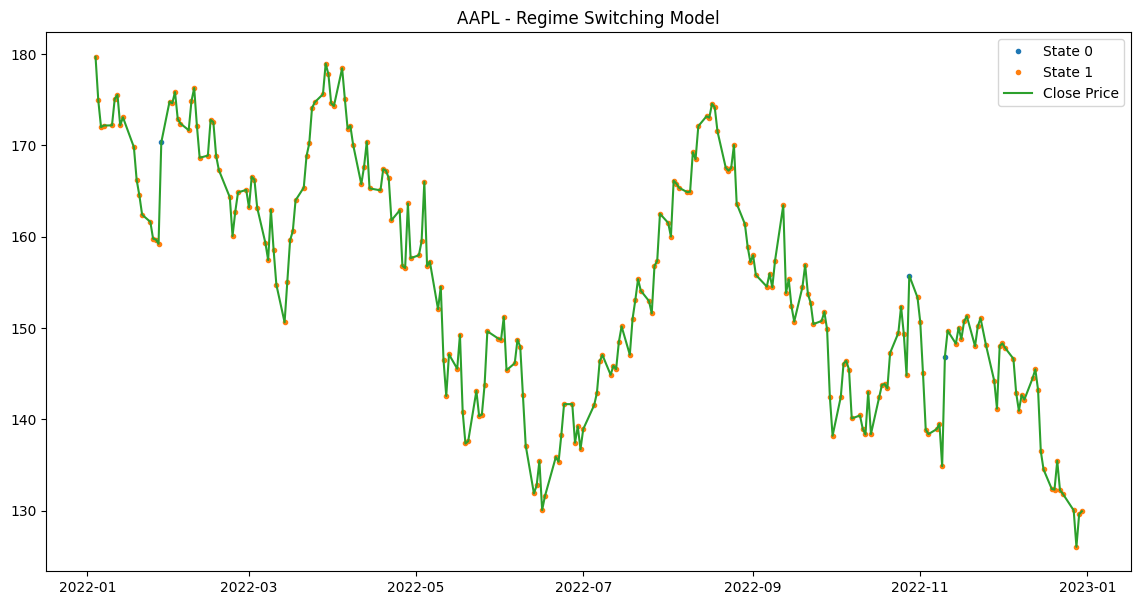

In [2]:

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate daily returns and reshape for HMM
returns = data['Close'].pct_change().dropna().values.reshape(-1, 1)

# Fit HMM model
model = GaussianHMM(n_components=2, covariance_type='diag', n_iter=1000)
model.fit(returns)

# Predict the hidden states
hidden_states = model.predict(returns)

# Add hidden states to the dataframe
data = data.iloc[1:]
data['State'] = hidden_states

# Plot the results
plt.figure(figsize=(14, 7))
for i in range(model.n_components):
    state = data[data['State'] == i]
    plt.plot(state.index, state['Close'], '.', label=f'State {i}')
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f'{symbol} - Regime Switching Model')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
Model is not converging.  Current: 593.3900526818409 is not greater than 593.3946369832139. Delta is -0.0045843013730291204
C:\Users\ayman\AppData\Local\Temp\ipykernel_9928\4128486709.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] = hidden_states
C:\Users\ayman\AppData\Local\Temp\ipykernel_9928\4128486709.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'] = 0
C:\Users\ayman\AppData\Local\Temp\ipykernel_

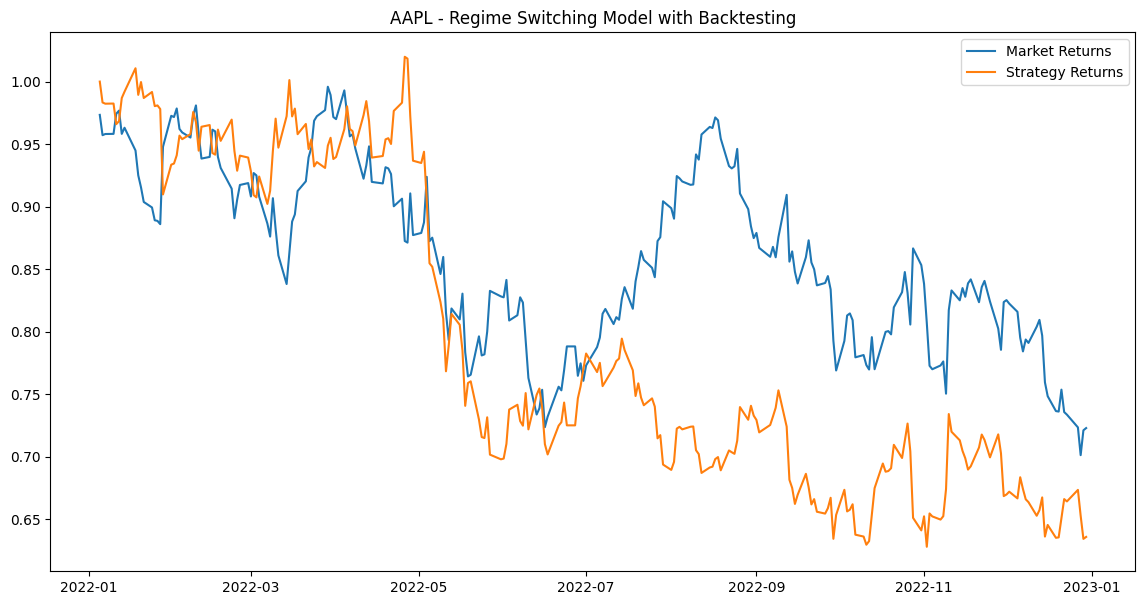

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate daily returns and reshape for HMM
returns = data['Close'].pct_change().dropna().values.reshape(-1, 1)

# Fit HMM model
model = GaussianHMM(n_components=2, covariance_type='diag', n_iter=1000)
model.fit(returns)

# Predict the hidden states
hidden_states = model.predict(returns)

# Add hidden states to the dataframe
data = data.iloc[1:]
data['State'] = hidden_states

# Generate trading signals based on regimes
data['Signal'] = 0
data['Signal'][1:] = np.where(data['State'][1:] == 1, 1, -1)

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title(f'{symbol} - Regime Switching Model with Backtesting')
plt.legend()
plt.show()
